# Baseline Scenario

In [1]:
# REPLACE THE FILE PATH WITH YOUR OWN!
# Program Directory --> C:\Users\Jordan\Research\cmu_tare_model
# Results export directory --> C:\Users\Jordan\Research\cmu_tare_model_outputs

# Measure Package 0: Baseline
menu_mp = 0
input_mp = 'baseline'
%run -i "C:\Users\Jordan\Research\cmu_tare_model\tare_model_scenario_baseline_v2.ipynb"

Loaded All TARE Model Functions
Copy and paste filepath for main folder here: C:\Users\Jordan\Research\cmu_tare_model
Enter the filepath for the output folder: C:\Users\Jordan\Research\cmu_tare_model_outputs
-------------------------------------------------------------------------------------------------------

Welcome to the Trade-off Analysis of residential Retrofits for energy Equity Tool (TARE Model)
Let's start by reading the data from the NREL EUSS Database.

Make sure that the zipped folders stay organized as they are once unzipped.
If changes are made to the file path, then the program will not run properly.
-------------------------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------------------------
BASELINE (Measure Package 0)
-------------------------------------------------------------------------------------------------------
Retrieving data for filename: bas


-------------------------------------------------------------------------------------------------------
Information for EASIUR Marginal Damage (Social Cost) Factors
-------------------------------------------------------------------------------------------------------
- Factor Type: Marginal Social Cost
- Calculation Method: Regression
- Metric: Marginal Social Cost [$/metric ton]
- Dollar Year: 2010
- Income Year: 2018
- Population Year: 2018
- Aggregation: Longitude, and Latitude Coordinates
- Pollutants: Primary PM2.5, Sulfur Dioxide (SO2), Nitrogen Oxides (NOx), Ammonia (NH3)
- Elevation (Ground, 150m, 300m) and Seasons (Winter, Spring, Summer, Fall)
-------------------------------------------------------------------------------------------------------

Copy and paste the name of the file that EASIUR generated here: easiur_PA2023-09-2823-17


Retrieving data for filename: easiur_PA2023-09-2823-17.csv
Located at filepath: C:\Users\Jordan\Research\cmu_tare_model\margDamages_EASIUR\e

Baseline Damages for cooking - nox:
410846    4.94
410847    2.07
410848    1.11
410850    2.62
410851    1.06
Name: baseline_cooking_damages_nox, dtype: float64
Baseline Damages for cooking - pm25:
410846     3.17
410847    14.58
410848     5.24
410850    18.45
410851     5.36
Name: baseline_cooking_damages_pm25, dtype: float64
Baseline Damages for cooking - co2:
410846    46.58
410847    41.61
410848    39.74
410850    52.67
410851    49.69
Name: baseline_cooking_damages_co2, dtype: float64
Baseline Health Damages for cooking:
410846     8.96
410847    25.13
410848    13.60
410850    31.81
410851    15.44
Name: baseline_cooking_damages_health, dtype: float64
Baseline Climate Damages for cooking:
410846    46.58
410847    41.61
410848    39.74
410850    52.67
410851    49.69
Name: baseline_cooking_damages_climate, dtype: float64



-------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
----------

In [2]:
print("Baseline Scenario - Model Run Complete")

Baseline Scenario - Model Run Complete


# Basic Retrofit Scenarios (MP8)
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

## Dataframe for Electric Resistance Cooking (MP7)

In [3]:
# Measure Package 7
menu_mp = 7
input_mp = 'upgrade07'

In [4]:
# Program Directory --> C:\Users\Jordan\Research\Paper1
# C:\\Users\\Jordan\\Research\\Paper1\\euss_data\\resstock_amy2018_release_1.1

filename = input_mp + "_" + "metadata_and_annual_results.csv"
print(f"Retrieving data for filename: {filename}")

change_directory = "euss_data\\resstock_amy2018_release_1.1\\state"
filepath = str(program_directory) + "\\" + str(change_directory) + "\\" + str(filename) 

print(f"Located at filepath: {filepath}")

Retrieving data for filename: upgrade07_metadata_and_annual_results.csv
Located at filepath: C:\Users\Jordan\Research\cmu_tare_model\euss_data\resstock_amy2018_release_1.1\state\upgrade07_metadata_and_annual_results.csv


In [5]:
# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp7 = pd.read_csv(filepath, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp7['in.vacancy_status'] == 'Occupied'
df_euss_am_mp7 = df_euss_am_mp7.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp7['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp7 = df_euss_am_mp7.loc[house_type_filter]

In [6]:
while True:
    try:
        if menu_state == 'N':
            print("You chose to analyze all of the United States.")
            break

        elif menu_state == 'Y':
            while True:
                state_filter = df_euss_am_mp7['in.state'] == input_state
                if state_filter.any():
                    print(f"""
You chose to filter for: {input_state}""")
                    df_euss_am_mp7 = df_euss_am_mp7.loc[state_filter, :]
                    break
                else:
                    print("""
Invalid state abbreviation. Please try again.""")

            while True:
                try:
                    if menu_city == 'N':
                        print(f"You chose to analyze all of state: {input_state}")
                        break

                    elif menu_city == 'Y':
                        while True:
                            city_filter = df_euss_am_mp7['in.city'] == (input_state + ", " + input_cityFilter)

                            if city_filter.any():
                                print(f"""
You chose to filter for: {input_state}, {input_cityFilter}""")
                                df_euss_am_mp7 = df_euss_am_mp7.loc[city_filter, :]
                                break
                            else:
                                print("""
Invalid city name. Please try again.""")

                        break

                    else:
                        print("""
Please enter a valid option.""")

                except Exception as e:
                    print("""
Invalid input. Please try again.""")

            break

        else:
            print("""
Please enter a valid option
            """)

    except Exception as e:
        print("""
Invalid input. Please try again.""")
df_euss_am_mp7


You chose to filter for: PA
You chose to analyze all of state: PA


bldg_id  upgrade      weight  applicability  in.sqft  \
410846      119        7  242.131013           True   2152.0   
410847      122        7  242.131013           True   2176.0   
410848      150        7  242.131013          False   1690.0   
410849      153        7  242.131013           True   2176.0   
410850      162        7  242.131013           True   2663.0   
...         ...      ...         ...            ...      ...   
433889   549882        7  242.131013           True   1202.0   
433891   549915        7  242.131013          False   2176.0   
433892   549937        7  242.131013           True    885.0   
433893   549963        7  242.131013           True   1690.0   
433894   549989        7  242.131013           True   1220.0   

                                           in.ahs_region  \
410846  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410847  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410848                          Non-CBSA Middle Atlantic   
410849  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410850  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
...                                                  ...   
433889                          Non-CBSA Middle Atlantic   
433891                          Non-CBSA Middle Atlantic   
433892                          Non-CBSA Middle Atlantic   
433893                          Non-CBSA Middle Atlantic   
433894                          Non-CBSA Middle Atlantic   

       in.ashrae_iecc_climate_zone_2004  \
410846                               4A   
410847                               4A   
410848                               5A   
410849                               4A   
410850                               4A   
...                                 ...   
433889                               5A   
433891                               5A   
433892                               5A   
433893                               5A   
433894                               5A   

       in.ashrae_iecc_climate_zone_2004_2_a_split in.bathroom_spot_vent_hour  \
410846                                         4A                      Hour1   
410847                                         4A                     Hour18   
410848                                         5A                      Hour2   
410849                                         4A                      Hour6   
410850                                         4A                      Hour8   
...                                           ...                        ...   
433889                                         5A                      Hour5   
433891                                         5A                      Hour0   
433892                                         5A                     Hour20   
433893                                         5A                     Hour13   
433894                                         5A                     Hour22   

        in.bedrooms in.building_america_climate_zone in.cec_climate_zone  \
410846            4                      Mixed-Humid                None   
410847            4                      Mixed-Humid                None   
410848            4                             Cold                None   
410849            3                      Mixed-Humid                None   
410850            5                      Mixed-Humid                None   
...             ...                              ...                 ...   
433889            2                             Cold                None   
433891            5                             Cold                None   
433892            4                             Cold                None   
433893            3                             Cold                None   
433894            3                             Cold                None   

             in.ceiling_fan in.census_division in.census_division_recs  \
410846  Standard Efficiency    Middle Atlantic       

## Dataframe used for other end-uses (MP8)

In [7]:
# Measure Package 8
menu_mp = 8
input_mp = 'upgrade08'

In [8]:
print("-------------------------------------------------------------------------------------------------------")
print("MODEL SCENARIO")
print("-------------------------------------------------------------------------------------------------------")
scenario_name = 'Basic-BAU'
cost_scenario = 'BAU Costs'
grid_scenario = 'Current Electricity Grid'
print(f'Scenario {scenario_name}:')
print(f'Basic Retrofit: Measure Package {menu_mp}')
print(f'{cost_scenario}')
print(f'{grid_scenario}')
print("-------------------------------------------------------------------------------------------------------")
print("\n")

-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-BAU:
Basic Retrofit: Measure Package 8
BAU Costs
Current Electricity Grid
-------------------------------------------------------------------------------------------------------




In [9]:
# Program Directory --> C:\Users\Jordan\Research\Paper1
# C:\\Users\\Jordan\\Research\\Paper1\\euss_data\\resstock_amy2018_release_1.1

filename = input_mp + "_" + "metadata_and_annual_results.csv"
print(f"Retrieving data for filename: {filename}")

change_directory = "euss_data\\resstock_amy2018_release_1.1\\state"
filepath = str(program_directory) + "\\" + str(change_directory) + "\\" + str(filename) 

print(f"Located at filepath: {filepath}")

Retrieving data for filename: upgrade08_metadata_and_annual_results.csv
Located at filepath: C:\Users\Jordan\Research\cmu_tare_model\euss_data\resstock_amy2018_release_1.1\state\upgrade08_metadata_and_annual_results.csv


In [10]:
# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp8 = pd.read_csv(filepath, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp8['in.vacancy_status'] == 'Occupied'
df_euss_am_mp8 = df_euss_am_mp8.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp8['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp8 = df_euss_am_mp8.loc[house_type_filter]

In [11]:
while True:
    try:
        if menu_state == 'N':
            print("You chose to analyze all of the United States.")
            break

        elif menu_state == 'Y':
            while True:
                state_filter = df_euss_am_mp8['in.state'] == input_state
                if state_filter.any():
                    print(f"""
You chose to filter for: {input_state}""")
                    df_euss_am_mp8 = df_euss_am_mp8.loc[state_filter, :]
                    break
                else:
                    print("""
Invalid state abbreviation. Please try again.""")

            while True:
                try:
                    if menu_city == 'N':
                        print(f"You chose to analyze all of state: {input_state}")
                        break

                    elif menu_city == 'Y':
                        while True:
                            city_filter = df_euss_am_mp8['in.city'] == (input_state + ", " + input_cityFilter)

                            if city_filter.any():
                                print(f"""
You chose to filter for: {input_state}, {input_cityFilter}""")
                                df_euss_am_mp8 = df_euss_am_mp8.loc[city_filter, :]
                                break
                            else:
                                print("""
Invalid city name. Please try again.""")

                        break

                    else:
                        print("""
Please enter a valid option.""")

                except Exception as e:
                    print("""
Invalid input. Please try again.""")

            break

        else:
            print("""
Please enter a valid option
            """)

    except Exception as e:
        print("""
Invalid input. Please try again.""")
df_euss_am_mp8


You chose to filter for: PA
You chose to analyze all of state: PA


bldg_id  upgrade      weight  applicability  in.sqft  \
410846      119        8  242.131013           True   2152.0   
410847      122        8  242.131013           True   2176.0   
410848      150        8  242.131013           True   1690.0   
410849      153        8  242.131013           True   2176.0   
410850      162        8  242.131013           True   2663.0   
...         ...      ...         ...            ...      ...   
433889   549882        8  242.131013           True   1202.0   
433891   549915        8  242.131013           True   2176.0   
433892   549937        8  242.131013           True    885.0   
433893   549963        8  242.131013           True   1690.0   
433894   549989        8  242.131013           True   1220.0   

                                           in.ahs_region  \
410846  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410847  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410848                          Non-CBSA Middle Atlantic   
410849  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410850  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
...                                                  ...   
433889                          Non-CBSA Middle Atlantic   
433891                          Non-CBSA Middle Atlantic   
433892                          Non-CBSA Middle Atlantic   
433893                          Non-CBSA Middle Atlantic   
433894                          Non-CBSA Middle Atlantic   

       in.ashrae_iecc_climate_zone_2004  \
410846                               4A   
410847                               4A   
410848                               5A   
410849                               4A   
410850                               4A   
...                                 ...   
433889                               5A   
433891                               5A   
433892                               5A   
433893                               5A   
433894                               5A   

       in.ashrae_iecc_climate_zone_2004_2_a_split in.bathroom_spot_vent_hour  \
410846                                         4A                      Hour1   
410847                                         4A                     Hour18   
410848                                         5A                      Hour2   
410849                                         4A                      Hour6   
410850                                         4A                      Hour8   
...                                           ...                        ...   
433889                                         5A                      Hour5   
433891                                         5A                      Hour0   
433892                                         5A                     Hour20   
433893                                         5A                     Hour13   
433894                                         5A                     Hour22   

        in.bedrooms in.building_america_climate_zone in.cec_climate_zone  \
410846            4                      Mixed-Humid                None   
410847            4                      Mixed-Humid                None   
410848            4                             Cold                None   
410849            3                      Mixed-Humid                None   
410850            5                      Mixed-Humid                None   
...             ...                              ...                 ...   
433889            2                             Cold                None   
433891            5                             Cold                None   
433892            4                             Cold                None   
433893            3                             Cold                None   
433894            3                             Cold                None   

             in.ceiling_fan in.census_division in.census_division_recs  \
410846  Standard Efficiency    Middle Atlantic       

### Post-Retrofit (MP) Consumption: WHOLE-HOME

In [12]:
print("-------------------------------------------------------------------------------------------------------")
print("Post-Retrofit (MP) Consumption: WHOLE-HOME")
print("-------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------


In [13]:
# df_enduse_compare(df_mp, category, df_baseline):
df_euss_am_mp8_home = df_enduse_compare(df_mp = df_euss_am_mp8,
                                        menu_mp=menu_mp,
                                        df_baseline = df_euss_am_baseline_home 
                                       )
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

## Public Perspective: Monetized Marginal Damages from Emissions

In [14]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------
""")




------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------



### Step 5: Calculate End-use specific marginal damages
**I used the total emissions column for each of the end uses for the following reasons:**
- Most homes only have 1 of each end-use, so it is unlikely that the homes have a significant consumption values from different fuel types. Thus, the total consumption and total emissions column (sum of each dwelling units consumption by end-use for each fuel) is fine to use to calculate marginal damages (social cost)
- We can visualize the emissions in 2 by 2 grid (CO2, PM25, SO2, NOx) with each appliance's heating fuel in a different shape or color. 

In [15]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------



### Post-Retrofit (MP) Marginal Damages: WHOLE-HOME

In [16]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Post-Retrofit (MP) Marginal Damages: WHOLE-HOME")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------


In [17]:
# td_losses = 0.06

# calculate_marginal_damages(df, grid_decarb=False)
df_euss_am_mp8_home = calculate_marginal_damages(df=df_euss_am_mp8_home,
                                                 grid_decarb=False
                                                )
df_euss_am_mp8_home

End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [18]:
heating_df_cols = ['bldg_id', 'subregion_eGRID', 'base_heating_fuel','heating_type','base_heating_efficiency',
                   'base_electricity_heating_consumption', 'base_fuelOil_heating_consumption', 'base_naturalGas_heating_consumption', 
                   'base_propane_heating_consumption', 'baseline_heating_consumption',
                   'margSocialCosts_so2','margDamage_factor_so2','margSocialCosts_nox','margDamage_factor_nox',
                   'margSocialCosts_pm25','margDamage_factor_pm25','margSocialCosts_co2','margDamage_factor_co2',
                   'baseline_heating_damages_so2','baseline_heating_damages_nox','baseline_heating_damages_pm25',
                   'baseline_heating_damages_co2','baseline_heating_damages_health','baseline_heating_damages_climate'
                  ]

df_test_heating = df_euss_am_mp8_home[heating_df_cols]
df_test_heating

bldg_id subregion_eGRID base_heating_fuel  \
0          119            RFCE       Natural Gas   
1          122            RFCE          Fuel Oil   
2          150            RFCE       Electricity   
3          162            RFCE          Fuel Oil   
4          181            RFCE       Electricity   
...        ...             ...               ...   
11604   549748            RFCE       Natural Gas   
11605   549915            RFCE       Electricity   
11606   549937            RFCW       Natural Gas   
11607   549963            RFCW       Natural Gas   
11608   549989            RFCE          Fuel Oil   

                       heating_type              base_heating_efficiency  \
0          Natural Gas Fuel Furnace               Fuel Furnace, 80% AFUE   
1             Fuel Oil Fuel Furnace             Fuel Furnace, 92.5% AFUE   
2             Electricity Baseboard  Electric Baseboard, 100% Efficiency   
3             Fuel Oil Fuel Furnace               Fuel Furnace, 80% AFUE   
4             Electricity Baseboard  Electric Baseboard, 100% Efficiency   
...                             ...                                  ...   
11604      Natural Gas Fuel Furnace             Fuel Furnace, 92.5% AFUE   
11605  Electricity Electric Furnace          Electric Furnace, 100% AFUE   
11606      Natural Gas Fuel Furnace             Fuel Furnace, 92.5% AFUE   
11607      Natural Gas Fuel Furnace               Fuel Furnace, 80% AFUE   
11608         Fuel Oil Fuel Furnace               Fuel Furnace, 80% AFUE   

       base_electricity_heating_consumption  base_fuelOil_heating_consumption  \
0                                  0.000000                          0.000000   
1                                  0.000000                      40613.202738   
2                              20677.336273                          0.000000   
3                                  0.000000                      49481.533317   
4                              21317.110419                          0.000000   
...                                     ...                               ...   
11604                              0.000000                          0.000000   
11605                          22397.663454                          0.000000   
11606                              0.000000                          0.000000   
11607                              0.000000                          0.000000   
11608                              0.000000                      15981.458518   

       base_naturalGas_heating_consumption  base_propane_heating_consumption  \
0                             17917.779078                               0.0   
1                                 0.000000                               0.0   
2                                 0.000000                               0.0   
3                                 0.000000                               0.0   
4                                 0.000000                               0.0   
...                                    ...                               ...   
11604                         19924.729765                               0.0   
11605                             0.000000                               0.0   
11606                         15632.703945                               0.0   
11607                         32303.172549                               0.0   
11608                             0.000000                               0.0   

       baseline_heating_consumption  margSocialCosts_so2  \
0                      17917.779078                17.98   
1                      40613.202738                17.98   
2                      20677.336273                16.09   
3                      49481.533317                17.98   
4                      21317.110419                16.01   
...                             ...                  ...   
11604                  19924.729765                17.40   
11605                  22397.663454                16.1

## Public Perspective: Public NPV

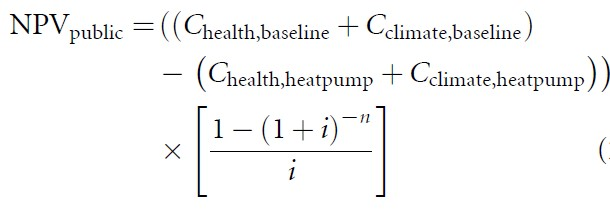

In [19]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("PUBLIC NPV")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
PUBLIC NPV
-------------------------------------------------------------------------------------------------------


### PUBLIC NPV: WHOLE-HOME

In [20]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Public NPV: WHOLE-HOME")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Public NPV: WHOLE-HOME
-------------------------------------------------------------------------------------------------------


In [21]:
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           interest_rate=0.07,
                                           grid_decarb=False
                                          )
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

## Private Perspective: Annual Energy Costs

In [22]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------
""")




------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------



### Post-Retrofit (MP) Fuel Cost: WHOLE-HOME

In [23]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Post-Retrofit (MP) Fuel Cost: WHOLE-HOME")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Fuel Cost: WHOLE-HOME
-------------------------------------------------------------------------------------------------------


In [24]:
# calculate_annual_fuelCost(df, state_region, df_fuelPrices_perkWh, cpi_ratio)
df_euss_am_mp8_home = calculate_annual_fuelCost(df=df_euss_am_mp8_home,
                                                state_region=input_state,
                                                df_fuelPrices_perkWh=df_fuelPrices_perkWh,
                                                cpi_ratio=cpi_ratio_2021_2018        
                                               )
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

## Private Perspective: Private NPV

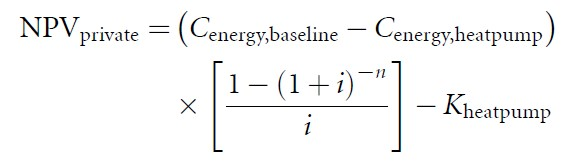

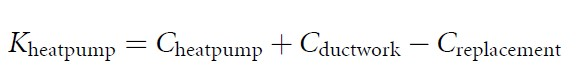

In [25]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP8))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
""")




------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP8))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------



In [26]:
# Program Directory --> C:\Users\Jordan\Research\Paper1
filename = 'tare_retrofit_costs.xlsx'
print(f"Retrieving data for filename: {filename}")

change_directory = "retrofit_costs"
filepath = str(program_directory) + "\\" + str(change_directory) + "\\" + str(filename) 

print(f"Located at filepath: {filepath}")

df_heating_retrofit_costs = pd.read_excel(io=filepath, sheet_name='heating_costs')
df_waterHeating_retrofit_costs = pd.read_excel(io=filepath, sheet_name='waterHeating_costs')
df_clothesDrying_retrofit_costs = pd.read_excel(io=filepath, sheet_name='clothesDrying_costs')
df_cooking_retrofit_costs = pd.read_excel(io=filepath, sheet_name='cooking_costs')
df_enclosure_retrofit_costs = pd.read_excel(io=filepath, sheet_name='enclosure_upgrade_costs')

Retrieving data for filename: tare_retrofit_costs.xlsx
Located at filepath: C:\Users\Jordan\Research\cmu_tare_model\retrofit_costs\tare_retrofit_costs.xlsx


In [27]:
# Program Directory --> C:\Users\Jordan\Research\Paper1
filename = 'rsMeans_cityCostIndex.csv'
print(f"Retrieving data for filename: {filename}")

change_directory = "inflation_data"
filepath = str(program_directory) + "\\" + str(change_directory) + "\\" + str(filename) 

print(f"Located at filepath: {filepath}")

df_rsMeans_cityCostIndex = pd.read_csv(filepath)

Retrieving data for filename: rsMeans_cityCostIndex.csv
Located at filepath: C:\Users\Jordan\Research\cmu_tare_model\inflation_data\rsMeans_cityCostIndex.csv


In [28]:
df_rsMeans_cityCostIndex = pd.DataFrame({
    'State': df_rsMeans_cityCostIndex['State'],
    'City': df_rsMeans_cityCostIndex['City'],
    'Material': (df_rsMeans_cityCostIndex['Material'] * (cpi_ratio_2021_2019)).round(2),
    'Installation': (df_rsMeans_cityCostIndex['Installation'] * (cpi_ratio_2021_2019)).round(2),
    'Average': (df_rsMeans_cityCostIndex['Average'] * (cpi_ratio_2021_2019)).round(2),
    'unit': '[$USD-2021]'
})
df_rsMeans_cityCostIndex

State              City  Material  Installation  Average  \
0    United States  +30 City Average      4.45          1.27     3.18   
1          Alabama        Birmingham      5.49          0.45     3.58   
2          Alabama        Huntsville      5.27          0.59     3.58   
3          Alabama            Mobile      5.73          0.31     3.76   
4          Alabama        Montgomery      5.77          1.04     4.10   
..             ...               ...       ...           ...      ...   
286      Wisconsin         Milwaukee      4.26          4.40     4.36   
287      Wisconsin            Racine      5.26          0.00     2.93   
288        Wyoming            Casper      6.40          0.00     4.29   
289        Wyoming          Cheyenne      6.38          0.15     4.10   
290        Wyoming      Rock Springs      6.14          0.89     4.41   

            unit  
0    [$USD-2021]  
1    [$USD-2021]  
2    [$USD-2021]  
3    [$USD-2021]  
4    [$USD-2021]  
..           ...  
286  [$USD-2021]  
287  [$USD-2021]  
288  [$USD-2021]  
289  [$USD-2021]  
290  [$USD-2021]  

[291 rows x 6 columns]

In [29]:
# Assuming df_rsMeans_cityCostIndex is your DataFrame with average costs
# Accounts for the costs of materials, labor and equipment and compares it to a national average of 30 major U.S. cities
average_cost_map = df_rsMeans_cityCostIndex.set_index('City')['Average'].to_dict()
rsMeans_national_avg = round((3.00 * (cpi_ratio_2021_2019)), 2)

# Use CCI to adjust for cost differences when compared to the national average
# Call the function and map the values for CCI adjustment
df_euss_am_mp8_home['rsMeans_CCI_avg'] = df_euss_am_mp8_home['city'].apply(map_average_cost)
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

### Space Heating and No Enclosure Upgrade

#### Space Heating Capital Costs

In [30]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Capital Costs: Space Heating")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
-------------------------------------------------------------------------------------------------------


In [77]:
# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_kBtuh_progressive', 'cost_per_kBtuh_reference', 'cost_per_kBtuh_conservative',
    'otherCost_progressive', 'otherCost_reference', 'otherCost_conservative'
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_heating_retrofit_costs[column] = round((df_heating_retrofit_costs[column] * df_heating_retrofit_costs['cpi_ratio'] * df_heating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_heating_equipment_cost = df_heating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
dict_heating_equipment_cost

{('Natural Gas Furnace', '95 AFUE'): {'action_measure': 'Replace',
  'fuel': 'Natural Gas',
  'cpi_ratio': 1.16317603677932,
  'cost_multiplier': 1.0,
  'unitCost_progressive': 3382.45,
  'unitCost_reference': 3382.45,
  'unitCost_conservative': 3382.45,
  'cost_per_kBtuh_progressive': 5.28,
  'cost_per_kBtuh_reference': 5.28,
  'cost_per_kBtuh_conservative': 5.28,
  'otherCost_progressive': 0.0,
  'otherCost_reference': 0.0,
  'otherCost_conservative': 0.0,
  'lifetime': 20,
  'source': 'NREL REMDB',
  'notes': 'Data Year 2013. Replacement Costs kept constant at NREL REMDB 50th percentile value.'},
 ('Electric Furnace', '100 AFUE'): {'action_measure': 'Replace',
  'fuel': 'Electricity',
  'cpi_ratio': 1.16317603677932,
  'cost_multiplier': 1.0,
  'unitCost_progressive': 2164.76,
  'unitCost_reference': 2164.76,
  'unitCost_conservative': 2164.76,
  'cost_per_kBtuh_progressive': 67.65,
  'cost_per_kBtuh_reference': 67.65,
  'cost_per_kBtuh_conservative': 67.65,
  'otherCost_progressive

In [32]:
# Call the function and obtain equipment specifications
# obtain_heating_system_specs(df)
df_euss_am_mp8_home = obtain_heating_system_specs(df_euss_am_mp8_home)

# calculate_heating_installationCost(df, cost_dict, rsMeans_national_avg)
calculate_heating_installationCost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg)

# calculate_heating_replacementCost(df, cost_dict, rsMeans_national_avg)
calculate_heating_replacementCost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg)

# Call the function and calculate installation premium based on existing housing characteristics
# calculate_heating_installation_premium(df, rsMeans_national_avg, cpi_ratio_2021_2013)
df_euss_am_mp8_home = calculate_heating_installation_premium(df_euss_am_mp8_home, rsMeans_national_avg, cpi_ratio_2021_2013)

# Display the df
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

### Water Heating

In [33]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Capital Costs: Water Heating")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
-------------------------------------------------------------------------------------------------------


In [34]:
# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_gallon_progressive', 'cost_per_gallon_reference', 'cost_per_gallon_conservative',
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_waterHeating_retrofit_costs[column] = round((df_waterHeating_retrofit_costs[column] * df_waterHeating_retrofit_costs['cpi_ratio'] * df_waterHeating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_waterHeating_equipment_cost = df_waterHeating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_waterHeating_equipment_cost

In [35]:
# calculate_waterHeating_installationCost(df, cost_dict, rsMeans_national_avg)
calculate_waterHeating_installationCost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg)

# calculate_waterHeating_replacementCost(df, cost_dict, rsMeans_national_avg)
calculate_waterHeating_replacementCost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg)

# Display the df
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

### Clothes Drying

In [36]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Capital Costs: Clothes Drying")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
-------------------------------------------------------------------------------------------------------


In [37]:
# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_clothesDrying_retrofit_costs[column] = round((df_clothesDrying_retrofit_costs[column] * df_clothesDrying_retrofit_costs['cpi_ratio'] * df_clothesDrying_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_clothesDrying_equipment_cost = df_clothesDrying_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_clothesDrying_equipment_cost

In [38]:
# calculate_clothesDrying_installationCost(df, cost_dict, rsMeans_national_avg)
calculate_clothesDrying_installationCost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg)

# calculate_clothesDrying_replacementCost(df, cost_dict, rsMeans_national_avg)
calculate_clothesDrying_replacementCost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg)

# Display the df
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

### Cooking

In [39]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Capital Costs: Cooking")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
-------------------------------------------------------------------------------------------------------


In [40]:
# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_cooking_retrofit_costs[column] = round((df_cooking_retrofit_costs[column] * df_cooking_retrofit_costs['cpi_ratio'] * df_cooking_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_cooking_equipment_cost = df_cooking_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_cooking_equipment_cost

In [41]:
# calculate_cooking_installationCost(df, cost_dict, rsMeans_national_avg)
calculate_cooking_installationCost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg)

# calculate_cooking_replacementCost(df, cost_dict, rsMeans_national_avg)
calculate_cooking_replacementCost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg)

# Display the df
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

## Private NPV Calculation for Whole Home

In [42]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Calculated Private NPV for WHOLE-HOME")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Calculated Private NPV for WHOLE-HOME
-------------------------------------------------------------------------------------------------------


In [43]:
# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, ira_rebates=False)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            interest_rate=0.07,
                                            ira_rebates=False
                                           )
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

## Determine Adoption Decision for WHOLE-HOME

In [44]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Home Retrofit Adoption without IRA Rebates")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Home Retrofit Adoption without IRA Rebates
-------------------------------------------------------------------------------------------------------


In [45]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=False, 
                                        grid_decarb=False
                                       )
df_euss_am_mp8_home

Determining Adoption Decision for each end-use ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [46]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                            category = 'heating',
#                            upgrade_column = 'upgrade_hvac_heating_efficiency'
#                           )

In [47]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [48]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [49]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electrification: Basic Retrofit

## Adoption Rate with IRA Rebates
### Scenario Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Grid

In [50]:
print("-------------------------------------------------------------------------------------------------------")
print("MODEL SCENARIO")
print("-------------------------------------------------------------------------------------------------------")
scenario_name = 'Basic-IRA'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Current Electricity Grid'
print(f'Scenario {scenario_name}:')
print(f'Basic Retrofit: Measure Package {menu_mp}')
print(f'{cost_scenario}')
print(f'{grid_scenario}')
print("-------------------------------------------------------------------------------------------------------")
print("\n")

-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-IRA:
Basic Retrofit: Measure Package 8
IRA Rebates
Current Electricity Grid
-------------------------------------------------------------------------------------------------------




In [51]:
# Program Directory --> C:\Users\Jordan\Research\Paper1
filename = 'nhgis0002_ds239_20185_puma.csv'
print(f"Retrieving data for filename: {filename}")

change_directory = "equity_data"
filepath = str(program_directory) + "\\" + str(change_directory) + "\\" + str(filename) 

print(f"Located at filepath: {filepath}")

Retrieving data for filename: nhgis0002_ds239_20185_puma.csv
Located at filepath: C:\Users\Jordan\Research\cmu_tare_model\equity_data\nhgis0002_ds239_20185_puma.csv


In [52]:
df_county_medianIncome = pd.read_csv(filepath, encoding='ISO-8859-1')
df_county_medianIncome = df_county_medianIncome.drop(0)
df_county_medianIncome = df_county_medianIncome.reset_index(drop=True)

cols_interest = ['GISJOIN', 'STUSAB', 'STATE', 'PUMAA', 'GEOID', 'NAME_E', 'AJZAE001', 'AJZAM001']
df_county_medianIncome = df_county_medianIncome[cols_interest]
df_county_medianIncome = df_county_medianIncome.rename(columns={"GISJOIN": "gis_joinID_puma", "STUSAB": "state_abbrev", "STATE": "state", "PUMAA": "puma_code", "GEOID": "census_geoID", "NAME_E": "name_estimate", "AJZAE001": "median_income_USD2018", "AJZAM001": "median_income_USD2018_marginOfError"})
df_county_medianIncome

gis_joinID_puma state_abbrev        state puma_code    census_geoID  \
0          G01000100           AL      Alabama       100  79500US0100100   
1          G01000200           AL      Alabama       200  79500US0100200   
2          G01000301           AL      Alabama       301  79500US0100301   
3          G01000302           AL      Alabama       302  79500US0100302   
4          G01000400           AL      Alabama       400  79500US0100400   
...              ...          ...          ...       ...             ...   
2373       G72000902           PR  Puerto Rico       902  79500US7200902   
2374       G72001001           PR  Puerto Rico      1001  79500US7201001   
2375       G72001002           PR  Puerto Rico      1002  79500US7201002   
2376       G72001101           PR  Puerto Rico      1101  79500US7201101   
2377       G72001102           PR  Puerto Rico      1102  79500US7201102   

                                          name_estimate median_income_USD2018  \
0     Lauderdale, Colbert, Franklin & Marion (Northe...                 44779   
1     Limestone & Madison (Outer) Counties--Huntsvil...                 64779   
2     Huntsville (North) & Madison (East) Cities PUM...                 62399   
3       Huntsville City (Central & South) PUMA, Alabama                 52811   
4               DeKalb & Jackson Counties PUMA, Alabama                 39499   
...                                                 ...                   ...   
2373  Trujillo Alto, Canóvanas, Loíza & Carolina (Su...                 25262   
2374                 Caguas Municipio PUMA, Puerto Rico                 25006   
2375  Gurabo, San Lorenzo, Juncos & Las Piedras Muni...                 22391   
2376  Río Grande, Fajardo, Luquillo, Ceiba, Vieques ...                 20621   
2377  Humacao, Yabucoa & Naguabo Municipios--Carr 53...                 18494   

     median_income_USD2018_marginOfError  
0                                   1317  
1                                   2670  
2                                   1595  
3                                   1814  
4                                   1447  
...                                  ...  
2373                                 972  
2374                                1128  
2375                                 888  
2376                                 815  
2377                                 759  

[2378 rows x 8 columns]

### WHOLE-HOME Retrofit Adoption with IRA Rebates

In [53]:
print("-------------------------------------------------------------------------------------------------------")
print("Home Retrofit Adoption with IRA Rebates")
print("-------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates
-------------------------------------------------------------------------------------------------------


In [54]:
# Create a copy of the results df and define it as results_IRA
# This needs to be done before running the calculate_percent_AMI function
df_euss_am_mp8_home = df_euss_am_mp8_home.copy()

# calculate_percent_AMI(df_results, df_results_IRA):
df_euss_am_mp8_home = calculate_percent_AMI(df_euss_am_mp8_home)
df_euss_am_mp8_home

bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [55]:
print("Calculating rebate amounts for Space Heating ...")
calculate_rebateIRA(df_euss_am_mp8_home, "heating")

Calculating rebate amounts for Space Heating ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [56]:
print("Calculating rebate amounts for Water Heating ...")
calculate_rebateIRA(df_euss_am_mp8_home, "waterHeating")

Calculating rebate amounts for Water Heating ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [57]:
print("Calculating rebate amounts for Clothes Drying ...")
calculate_rebateIRA(df_euss_am_mp8_home, "clothesDrying")

Calculating rebate amounts for Clothes Drying ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [58]:
print("Calculating rebate amounts for Cooking ...")
calculate_rebateIRA(df_euss_am_mp8_home, "cooking")

Calculating rebate amounts for Cooking ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [59]:
print("Calculating Private NPV for each end-use ...")

# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, ira_rebates=False)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            interest_rate=0.07,
                                            ira_rebates=True
                                           )
df_euss_am_mp8_home

Calculating Private NPV for each end-use ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [60]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=True, 
                                        grid_decarb=False
                                       )
df_euss_am_mp8_home

Determining Adoption Decision for each end-use ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [61]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [62]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [63]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [64]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electricity Grid Decarbonization Scenarios

"Since the lifetime of a heat pump is 15 years [31, 32], we assume that emissions will diminish in all US electric grids during the life of the heat pump. To capture this effect, we use electric grid emissions projections from EPRI's National Electrification Assessment [16]. We use that study's 'Progressive' scenario (a balance between the study's 'Conservative' and 'Transformative' scenarios) to assume that from 2017 to 2032, (a) coal energy will decline by 75% from 1200 TWh to 300 TWh and (b) CO2 emissions intensity will decline by 45% from 850 lbs MWh−1 to 450 lbs MWh−1. We assume that the majority of health damages from coal energy [33]. Thus, we assume for each grid region that health damages will decline by 75% and CO2 emissions by 45% by 2032. We assume a linear trend."

15 year period from 2017 to 2032. Then levels off after 2032. 
- 75% health damage reduction / 15 years = 5%/year
- 45% CO2 emissions reduction / 15 years = 3%/year

In [65]:
print("-------------------------------------------------------------------------------------------------------")
print("MODEL SCENARIO")
print("-------------------------------------------------------------------------------------------------------")
scenario_name = 'Basic-IRA-Decarb'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Gradually Decarbonizing Grid'
print(f'Scenario {scenario_name}:')
print(f'Basic Retrofit: Measure Package {menu_mp}')
print(f'{cost_scenario}')
print(f'{grid_scenario}')
print("-------------------------------------------------------------------------------------------------------")
print("\n")

-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-IRA-Decarb:
Basic Retrofit: Measure Package 8
IRA Rebates
Gradually Decarbonizing Grid
-------------------------------------------------------------------------------------------------------




In [66]:
pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# Scenario Basic-IRA-Decarb: 
# Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid
**Steps**:
- Private Perspective Impacts do not change with the Decarbonizing Grid
- Public Perspective Impacts do change:
    - Emissions and damages from pollutants changes with a gradually decarbonizing grid
    - Updated Public NPV (gridDecarb) value and function
    - Update Net NPV (ira_gridDecarb)
    - Updated Adoption Rate (ira_gridDecarb)

## IRA, Grid Decarb: Public NPV and Adoption Rate

In [67]:
print("\n")
print("-------------------------------------------------------------------------------------------------------")
print("Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid")
print("-------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid
-------------------------------------------------------------------------------------------------------


In [68]:
print("Calculating Marginal Damages for each end-use ...")

# calculate_marginal_damages(df, grid_decarb=False)
df_euss_am_mp8_home = calculate_marginal_damages(df=df_euss_am_mp8_home,
                                                 grid_decarb=True)
df_euss_am_mp8_home

Calculating Marginal Damages for each end-use ...
End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [69]:
print("Calculating Public NPV for each end-use ...")
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           interest_rate=0.07,
                                           grid_decarb=True
                                          )
df_euss_am_mp8_home

Calculating Public NPV for each end-use ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [70]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=True, 
                                        grid_decarb=True
                                       )
df_euss_am_mp8_home

Determining Adoption Decision for each end-use ...


bldg_id  square_footage census_region building_america_climate_zone  \
0          119          2152.0     Northeast                   Mixed-Humid   
1          122          2176.0     Northeast                   Mixed-Humid   
2          150          1690.0     Northeast                          Cold   
3          162          2663.0     Northeast                   Mixed-Humid   
4          181           885.0     Northeast                          Cold   
...        ...             ...           ...                           ...   
11604   549748          3301.0     Northeast                   Mixed-Humid   
11605   549915          2176.0     Northeast                          Cold   
11606   549937           885.0     Northeast                          Cold   
11607   549963          1690.0     Northeast                          Cold   
11608   549989          1220.0     Northeast                          Cold   

      cambium_GEA_region state                     city    county  \
0                  RFCEc    PA    Not in a census Place  G4200450   
1                  RFCEc    PA  In another census Place  G4200450   
2                  RFCEc    PA  In another census Place  G4201190   
3                  RFCEc    PA    Not in a census Place  G4200450   
4                  RFCEc    PA    Not in a census Place  G4200270   
...                  ...   ...                      ...       ...   
11604              RFCEc    PA    Not in a census Place  G4200910   
11605              RFCEc    PA                Lancaster  G4200710   
11606              RFCWc    PA  In another census Place  G4200050   
11607              RFCWc    PA  In another census Place  G4201290   
11608              RFCEc    PA    Not in a census Place  G4201110   

      gisjoin_county_puma      county_and_puma     weather_file_city  \
0               G42003301  G4200450, G42003301     Philadelphia Intl   
1               G42003303  G4200450, G42003303     Philadelphia Intl   
2               G42001100  G4201190, G42001100   Williamsport Lycomi   
3               G42003301  G4200450, G42003301     Philadelphia Intl   
4               G42001200  G4200270, G42001200       University Park   
...                   ...                  ...                   ...   
11604           G42003103  G4200910, G42003103   Willow Grove Nas Jr   
11605           G42003501  G4200710, G42003501             Lancaster   
11606           G42001900  G4200050, G42001900  Butler Co Scholter F   
11607           G42002003  G4201290, G42002003          Allegheny Co   
11608           G42003800  G4201110, G42003800   John Murtha Johnsto   

       Longitude  Latitude           building_type         income  \
0         -75.23     39.87  Single-Family Attached  100000-119999   
1         -75.23     39.87  Single-Family Detached    25000-29999   
2         -76.92     41.24  Single-Family Detached    50000-59999   
3         -75.23     39.87  Single-Family Detached        200000+   
4         -77.84     40.85  Single-Family Detached  100000-119999   
...          ...       ...                     ...            ...   
11604     -75.15     40.20  Single-Family Detached  180000-199999   
11605     -76.29     40.12  Single-Family Detached    80000-99999   
11606     -79.94     40.78  Single-Family Detached    80000-99999   
11607     -79.92     40.36  Single-Family Detached    80000-99999   
11608     -78.83     40.30  Single-Family Detached    80000-99999   

      federal_poverty_level occupancy tenure vacancy_status base_heating_fuel  \
0                     400%+         4  Owner       Occupied       Natural Gas   
1                  200-300%         1  Owner       Occupied          Fuel Oil   
2                  300-400%         2  Owner       Occupied       Electricity   
3                     400%+         4  Owner       Occupied          Fuel Oil   
4                     400%+         2  Owner       Occupied       Electricity   
...                     ...       ...    ...            ...  

In [71]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [72]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [73]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [74]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Model Runtime

In [75]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 3 minutes and 13 seconds to execute.


In [76]:
# %whos